### Imports:

In [1]:
# libs
from numba import set_num_threads
# adjust this to your preference. at least one less than cpu cores is recommended,
# since numba code can't easily be interrupted and you might lock up your system if
# something goes wrong
set_num_threads(8)

import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np

%matplotlib widget
from IPython import display

from scipy.optimize import curve_fit

# code
import randomwalk
import energy
import randomwalk_statistics
import annealing
import interaction
import barrier

### Constants:

In [2]:
# consts
LEN_PROTEINS = 30

NUM_AVGS_WALK = 10000
LEN_WALK = 100

NUM_AVGS_EVALUES = int(1e6)

NUM_MC_STEPS = int(2e3)
MC_TEMP = 1
MC_TEMP_HIGH = 10

NUM_T_STEPS_ANNEALING = int(1e2)
NUM_STEPS_AT_T_ANNEALING = int(1e4)
INIT_TEMP_ANNEALING = 10
FINAL_TEMP_ANNEALING = 0

NUM_T_STEPS_ANNEALING_AV = int(1e2)
NUM_STEPS_AT_T_ANNEALING_AV = int(1e4)
RUNS_ANNEALING = 40

NUM_T_STEPS_EX6 = int(1e2)
NUM_STEPS_AT_T_EX6 = int(1e4)

# plotting
DPI = 600
FMT = 'png'

### Fit functions:

In [3]:
def power(x, a, b):
    return a*x**b

### Ex. 1:

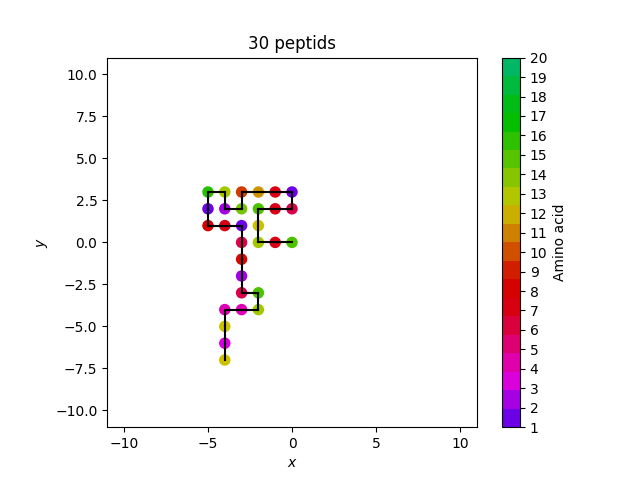

In [4]:
grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
while(coord_vec[-1].x == 0): # discard protein walks that got stuck
    grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
fig, ax = randomwalk.plot_protein(coord_vec, dim=LEN_PROTEINS/3, path="")
plt.savefig(f'figures/ex1.{FMT}', dpi = DPI, format = FMT)

### Ex. 2:

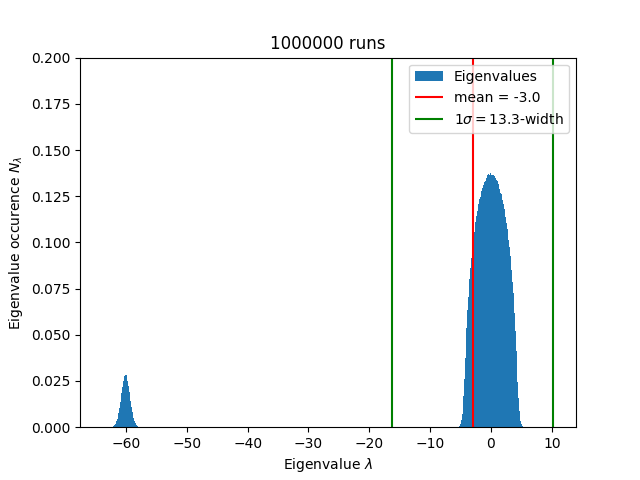

In [5]:
fig, ax, eigenvalues, ev_mean, ev_std = energy.eigenvalue_statistics(runs=NUM_AVGS_EVALUES, path="")
plt.savefig(f'figures/ex2.{FMT}', dpi = DPI, format = FMT)

### Ex. 3:

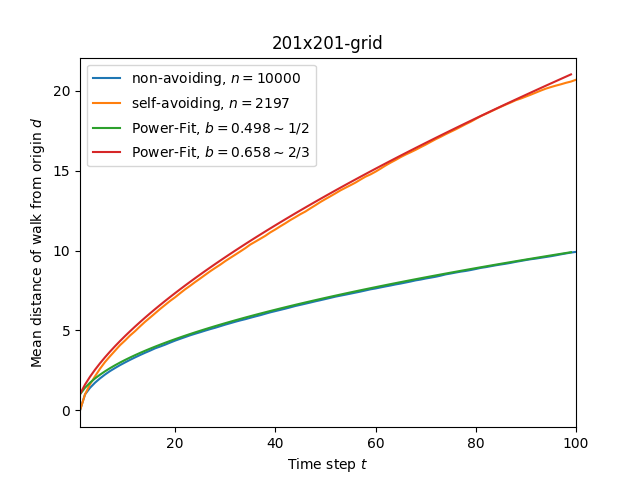

In [6]:
fig, ax, distance_r, distance_sa = randomwalk_statistics.mean_sq_pos_stats_both(NUM_AVGS_WALK, LEN_WALK, LEN_WALK, "")
step = np.asarray(range(LEN_WALK))
p, c = curve_fit(power, step, distance_r)
p2, c2 = curve_fit(power, step, distance_sa)
ax.plot(step, power(step, p[0], p[1]), label=f"Power-Fit, $b={np.round(p[1], 3)}\\sim 1/2$")
ax.plot(step, power(step, p2[0], p2[1]), label=f"Power-Fit, $b={np.round(p2[1],3)}\\sim 2/3$")
#ax.loglog()
ax.set_xlim([1, LEN_WALK])
ax.legend()
fig.savefig(f'figures/ex3.{FMT}', dpi = DPI, format = FMT)


Exponents reproduce analytical results. ^

### Ex. 4:

### Animation:

In [7]:
anim, fig, ax1, ax2, grids_vecs = energy.animated_monte_carlo(length=LEN_PROTEINS, mc_steps=1000, T=1, frame_interval=10, fps=8, path="")
vid = anim.to_html5_video()
html = display.HTML(vid)
display.display(html)
plt.close(fig)
anim, fig, ax1, ax2, grids_vecs = energy.animated_monte_carlo(length=LEN_PROTEINS, mc_steps=1000, T=10, frame_interval=10, fps=8, path="")
vid2 = anim.to_html5_video()
html2 = display.HTML(vid2)
display.display(html2)
plt.close(fig)


MC done, saving gif. This may take a while.


MC done, saving gif. This may take a while.


### Plot T=1:

Barriers:
MC Schritte bis zur ersten Barriere: 263
Energiebarrieren: [0.23582996]


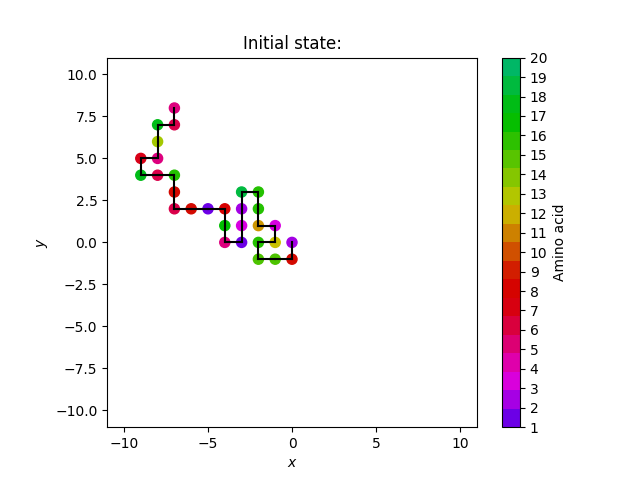

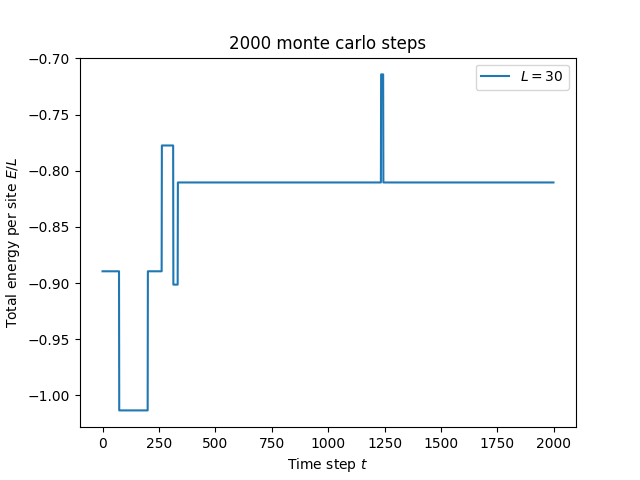

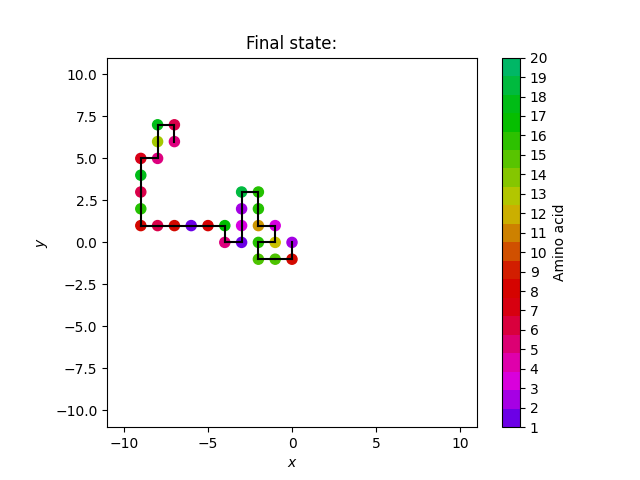

In [8]:
fig, ax, ergs, grid, coord_vec, figPrev, axPrev = energy.evolve_protein_plot_energy(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=MC_TEMP, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex4_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex4_erg.{FMT}', dpi = DPI, format = FMT)
fig2, ax2 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax2.set_title("Final state:")
fig2.savefig(f'figures/ex4_protein.{FMT}', dpi = DPI, format = FMT)

### Plot T=10:

Barriers:
MC Schritte bis zur ersten Barriere: 48
Energiebarrieren: [0.2127929]


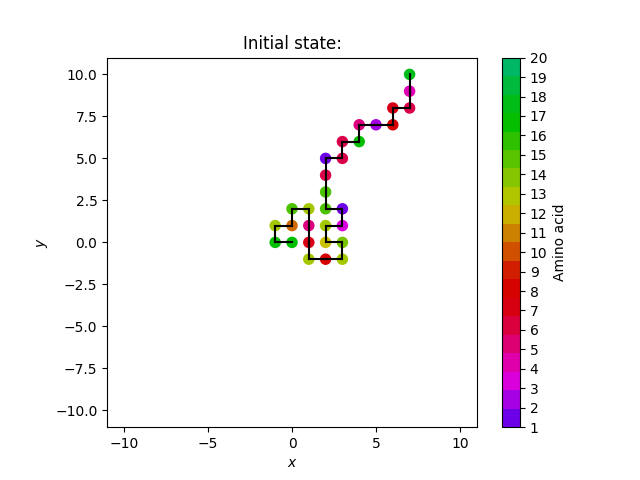

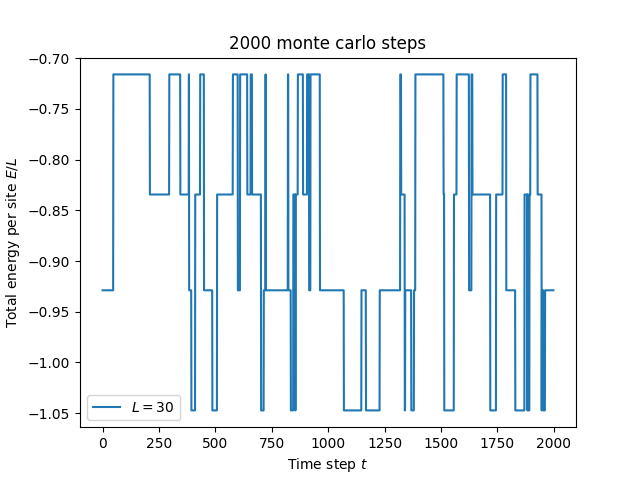

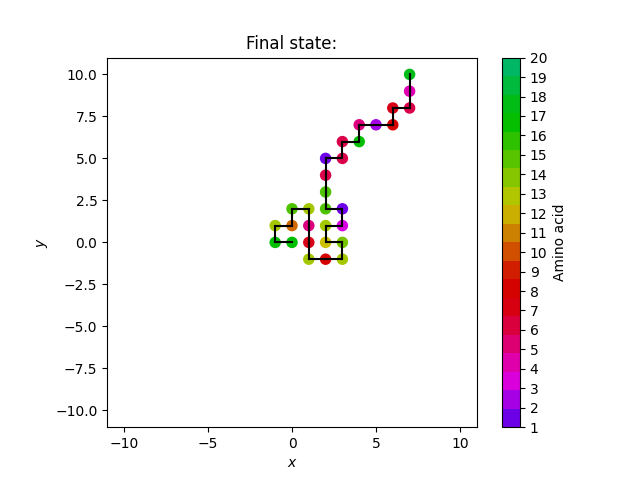

In [9]:
fig, ax, ergs, grid, coord_vec, figPrev, axPrev = energy.evolve_protein_plot_energy(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=MC_TEMP_HIGH, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex4_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex4_erg.{FMT}', dpi = DPI, format = FMT)
fig2, ax2 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax2.set_title("Final state:")
fig2.savefig(f'figures/ex4_protein.{FMT}', dpi = DPI, format = FMT)

### Ex. 5:

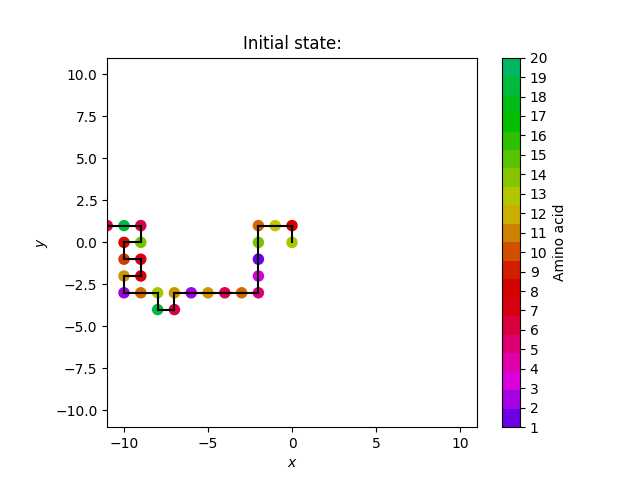

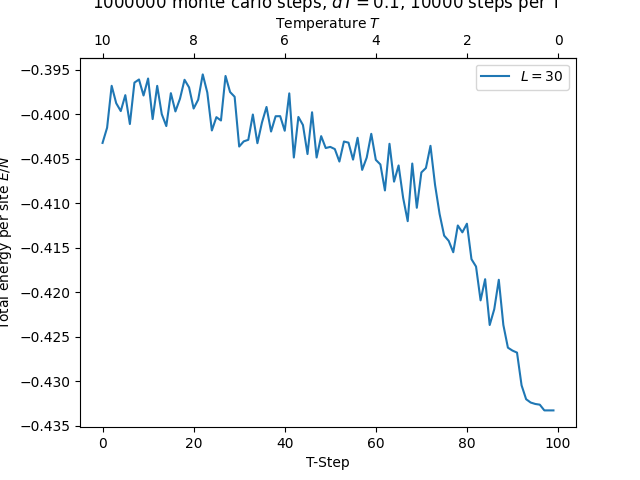

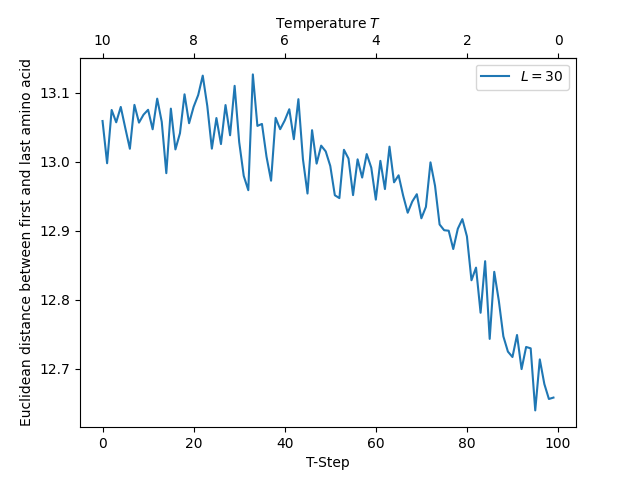

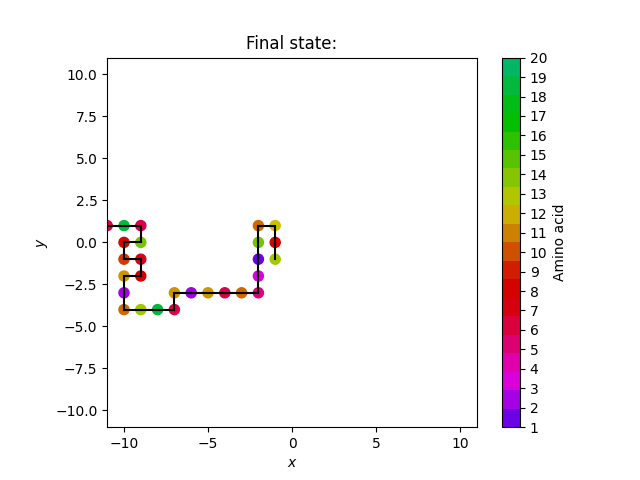

In [10]:
ergs, grid, coord_vec, fig, ax, ax2, geo_dist, fig_geo, ax_geo, ax2geo, figPrev, axPrev \
    = annealing.averaged_annealing(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING, num_at_T=NUM_STEPS_AT_T_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING, path="")
ax_geo.set_xscale("linear")
fig_geo.savefig(f'figures/ex5_dist.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex5_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex5_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex5_protein.{FMT}', dpi = DPI, format = FMT)

### Averaged:

1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40
40 / 40


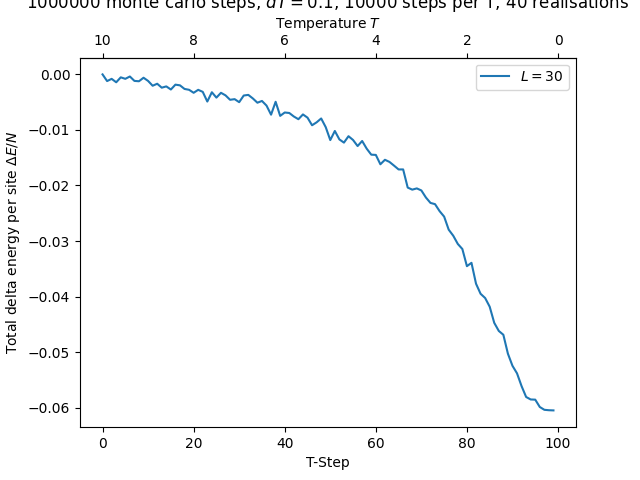

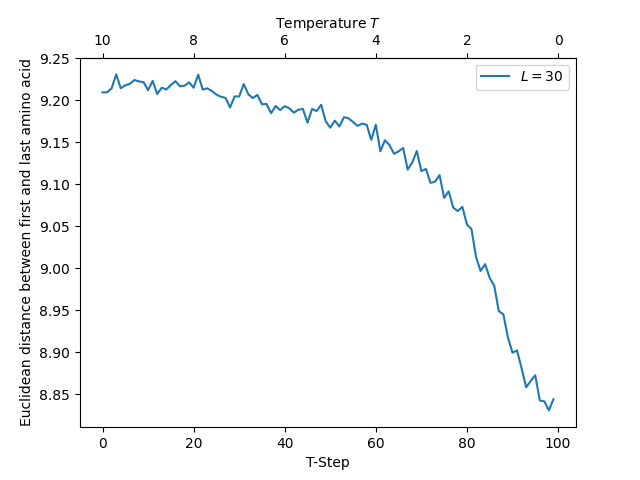

In [11]:
delta_ergs_avg, geo_dist_avg, fig, ax, ax2, fig_geo, ax_geo, ax_geo2 \
    = annealing.annealing_multiple_runs(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING_AV, num_at_T=NUM_STEPS_AT_T_ANNEALING_AV, runs=RUNS_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING, path="")

# Ex. 6:

In [12]:
J = np.full((20,20), -3)

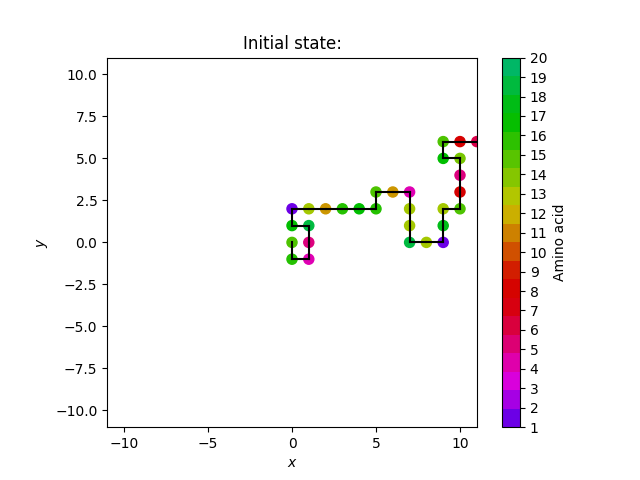

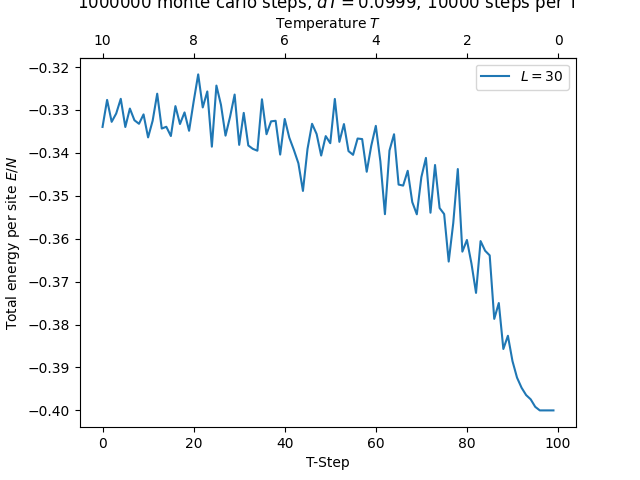

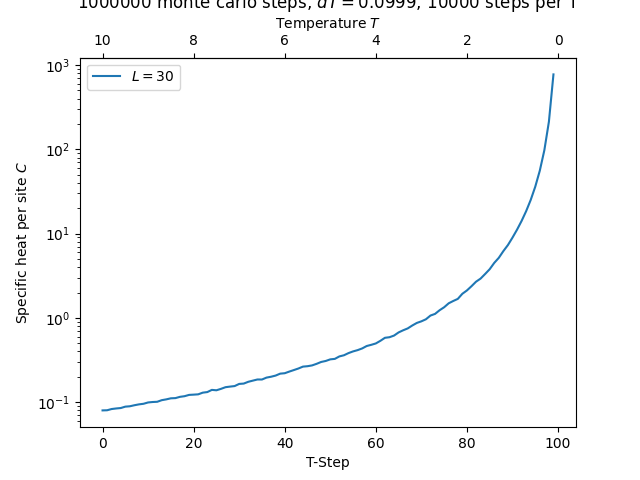

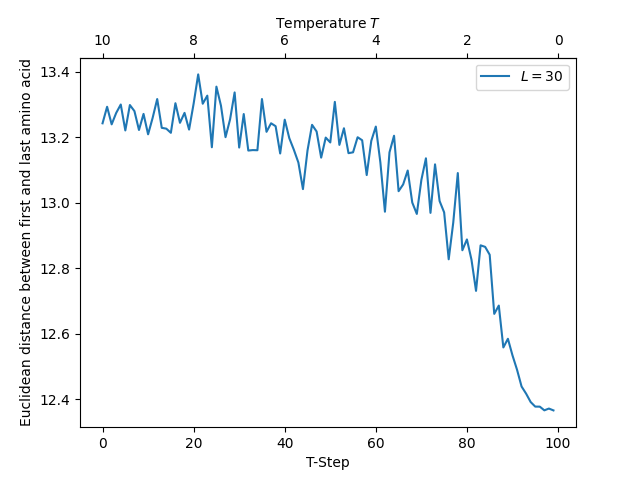

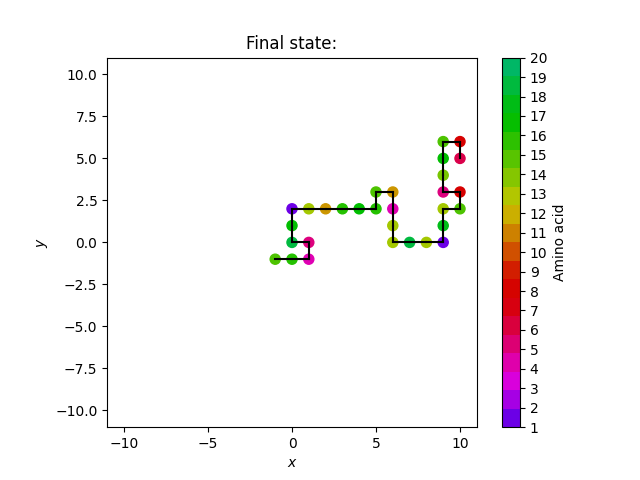

In [13]:

ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev, figC, axC, ax3, fig_geo, ax_geo, ax2_geo \
    = interaction.given_interaction_matrix(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_EX6, num_at_T=NUM_STEPS_AT_T_EX6, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING,J = J, path="")


fig_geo.savefig(f'figures/ex6_dist.{FMT}', dpi = DPI, format = FMT)
figC.savefig(f'figures/ex6_specheat.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex6_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex6_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex6_protein.{FMT}', dpi = DPI, format = FMT)

### Analytischer Ausdruck für C:


\begin{align}
    \frac{C}{N} &= \frac{1}{N}\frac{\langle (\Delta H)^2 \rangle}{T^2} = \frac{1}{N}\frac{\langle H^2 \rangle - \langle H \rangle^2}{T^2} \\ & \\
                & \overset{!}{=} \frac{1}{N} \frac{\varepsilon^2\langle n^2 \rangle - \varepsilon^2\langle n\rangle ^2}{T^2} \\ & \\
    \Rightarrow E^2 &= \langle H \rangle^2 = \varepsilon^2 \langle n \rangle^2 \\ 
    \Rightarrow E &= \langle H \rangle = \varepsilon \langle n \rangle
\end{align}

Intuitiv klar: Energie = Anzahl Beiträge * Beitrag

In [14]:
J2 = 3*np.random.choice([-1, 1], (20, 20))

/home/maxm/compphys/2/CompPhys2/randomwalk.py:307: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


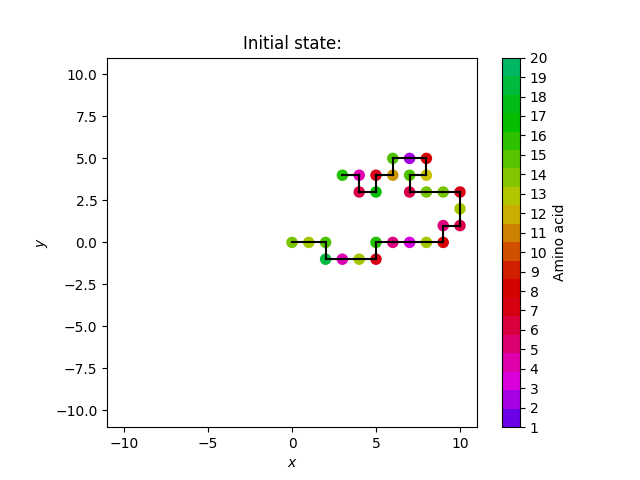

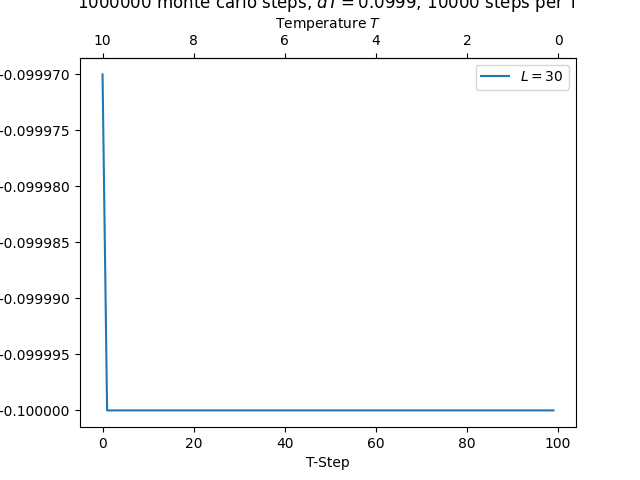

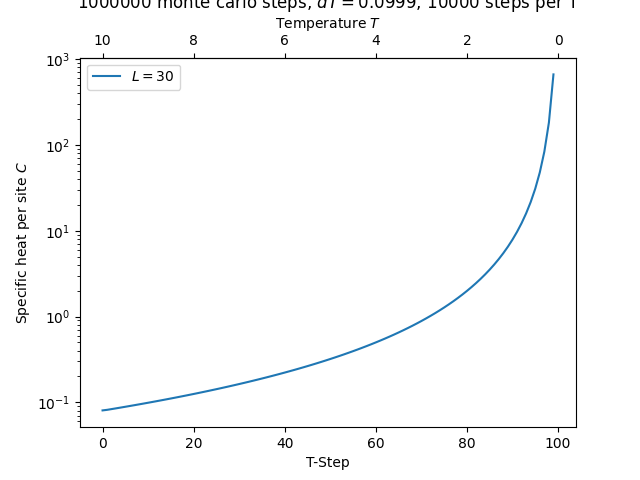

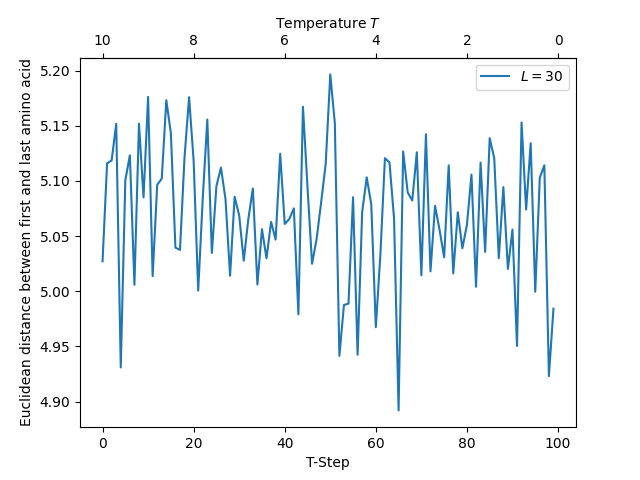

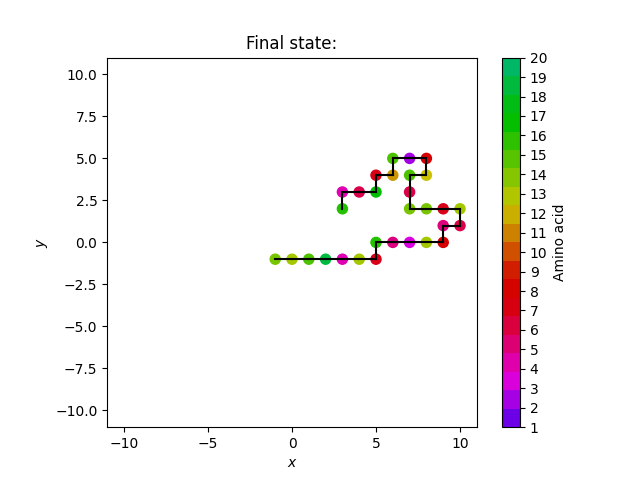

In [15]:
ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev, figC, axC, ax3, fig_geo, ax_geo, ax2_geo \
    = interaction.given_interaction_matrix(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_EX6, num_at_T=NUM_STEPS_AT_T_EX6, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING,J = J2, path="")
fig_geo.savefig(f'figures/ex6_dist.{FMT}', dpi = DPI, format = FMT)
figC.savefig(f'figures/ex6_specheat.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex6_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex6_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex6_protein.{FMT}', dpi = DPI, format = FMT)

### Zeit bis metastabiler Zustand bei $T=1$:

In [16]:
time, dtime = interaction.time_to_metastable(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=1, J = J, runs=1000)
print("Ohne Vorzeichen:", time, "±", dtime)
time, dtime = interaction.time_to_metastable(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=1, J = J2, runs=1000)
print("Mit Vorzeichen:",time, "±", dtime)

Ohne Vorzeichen: 521.536 ± 17.39275325609938
Mit Vorzeichen: 499.0241935483871 ± 17.437774923151782
